# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Q.1** Import all required modules

In [8]:
#Your code here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import os
import imghdr



**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [43]:
data_dir="/content/drive/MyDrive/data"
data=tf.keras.utils.image_dataset_from_directory(data_dir)


Found 1657 files belonging to 4 classes.




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [44]:
data_iterator=data.as_numpy_iterator()

In [45]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

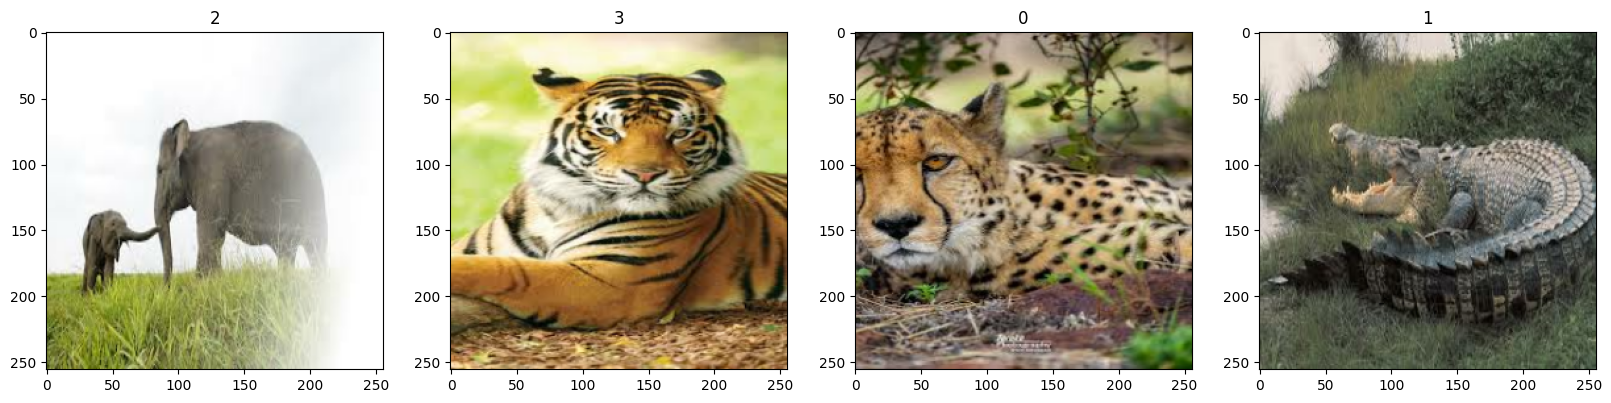

In [46]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [47]:
data=data.map(lambda x,y:(x/255,y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [48]:
#Your code here
train_size=int(len(data)*0.8)
test_size=int(len(data)*0.2)
print(train_size)
print(test_size)
print(test_size+train_size)
print(len(data))

train=data.take(train_size)

test=data.skip(train_size).take(test_size)

41
10
51
52


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a Conv2D layer with 96 filters, kernel size 3x3, ReLU activation, and input shape 256x256x3
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))

# Add a MaxPooling2D layer with pool size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a Conv2D layer with 64 filters, kernel size 3x3, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))

# Add another MaxPooling2D layer with default pool size 2x2
model.add(MaxPooling2D())

# Flatten the output
model.add(Flatten())

# Add a Dense layer with 256 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add a final Dense layer with 4 units and softmax activation
model.add(Dense(4, activation='softmax'))

# Display the model summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 125, 125, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      15,745,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,765,924 (60.14 MB)

 Trainable params: 15,765,924 (60.14 MB)

 Non-trainable params: 0 (0.00 B)

**Q.6** Compile your model

In [62]:
model.compile(loss=SparseCategoricalCrossentropy(),optimizer=Adam(),metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [63]:
model.fit(train,epochs=10)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.2776 - loss: 3.9183
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.5819 - loss: 1.0415
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.8022 - loss: 0.5561
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - accuracy: 0.9399 - loss: 0.2364
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.9711 - loss: 0.1029
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 240ms/step - accuracy: 0.9845 - loss: 0.0713
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - accuracy: 0.9910 - loss: 0.0417
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.9898 - loss: 0.0479
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.9897 - loss: 0.0329
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 229ms/step - accuracy: 0.9952 - loss: 0.0158


**Q.8** Test your code with test set

In [64]:
loss,accuracy=model.evaluate(test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.8859 - loss: 0.4576


In [66]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.856249988079071


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**